# Piramid Based Segmentation

### Image Piramid
- https://darkpgmr.tistory.com/137  
  
- 이미지를 여러 스케일(scale)에 걸쳐서 분석하는 가장 기본적인 방법은 입력 이미지의 크기를 단계적으로 변화(축소)시켜 가면서 필요한 분석 작업을 하는 것이다. 이 때 이렇게 생성된 일련의 이미지 집합을 이미지 피라미드(image pyramid)라 부른다.  
  
- 이미지의 크기(size)를 축소시킬수록 이미지의 스케일(scale)은 (반비례로) 큰 값을 갖는다. 축소된 이미지에서는 숲을 보게 되고 확대된 이미지에서는 나뭇잎을 보게 됨을 생각하면 된다.  

- Scale space 이론은 대상의 구조를 여러 스케일에 걸쳐 다루기 위한 공식화된 이론으로서, 대상을 스케일 축을 파라미터로 하는 공간상의 한 점(instance)으로 표현한다. 이미지의 경우 이미지 f(x,y)에 대한 scale space 표현은 Gaussian blurring(2D Gaussian filter와의 convolution)을 통해 생성되는 일련의 스무딩(smoothing)된 이미지 fσ(x,y) 들로 정의된다.

!['image1'](https://t1.daumcdn.net/cfile/tistory/271C783A536F3D8D24)
!['image2'](https://t1.daumcdn.net/cfile/tistory/2140BB47536F3DE704)

- 그렇다면 블러링된 이미지의 스케일 값은 얼마일까? 블러링된 이미지의 스케일은 사용된 Gaussian 필터의 시그마(σ)에 비례한다. 즉, 만일 σ2 = kσ1라면 fσ2(x,y)의 스케일은 fσ1(x,y)의 스케일의 k배가 된다. 

### Piramid based segmentation

__pyrDown, pyrUp__  
- 영상을 가우시안 블러링 후 dstsize에 주어진 크기로 축소 또는 확대. 기본값은 두배축소 및 확대
- dst	=	cv.pyrDown(	src[, dst[, dstsize[, borderType]]]	)
- dst	=	cv.pyrUp(	src[, dst[, dstsize[, borderType]]]	) 
  
__pyrMeanShiftFiltering__ 
- 피라미드 기반 평균이동
- dst	=	cv.pyrMeanShiftFiltering(	src, sp, sr[, dst[, maxLevel[, termcrit]]]	)

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def floodFillPostProcess(src, diff=(2,2,2)):
    img = src.copy()
    rows, cols = img.shape[:2]
    mask   = np.zeros(shape=(rows+2, cols+2), dtype=np.uint8)
    for y in range(rows):
        for x in range(cols):
            if mask[y+1, x+1] == 0:
                r = np.random.randint(256)
                g = np.random.randint(256)
                b = np.random.randint(256)
                cv2.floodFill(img,mask,(x,y),(r,g,b),diff,diff)
    return img

In [9]:
src = cv2.imread('img/hand.jpg',cv2.IMREAD_COLOR)
src=cv2.cvtColor(src,cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(src, cv2.COLOR_RGB2HSV)
dst  = floodFillPostProcess(src)
dst2 = floodFillPostProcess(hsv)

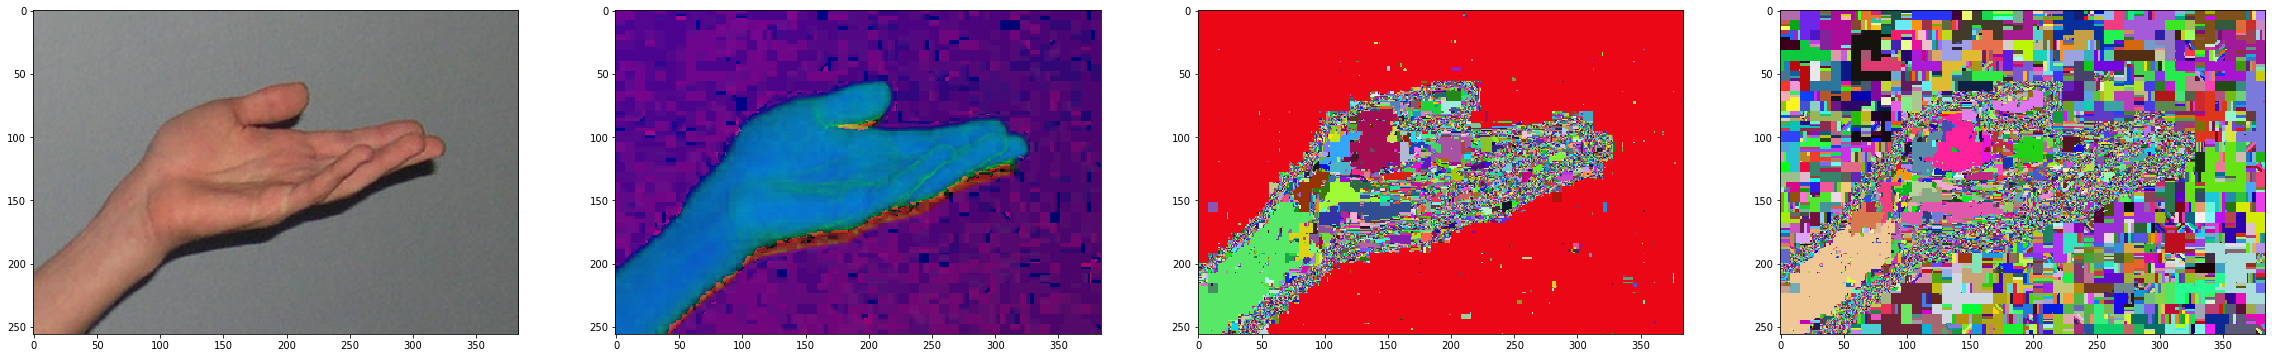

In [10]:
plt.figure(figsize=(40,160))

plt.subplot(1,4,1)
plt.imshow(src)

plt.subplot(1,4,2)
plt.imshow(hsv)

plt.subplot(1,4,3)
plt.imshow(dst)

plt.subplot(1,4,4)
plt.imshow(dst2)

plt.show()

In [11]:
res = cv2.pyrMeanShiftFiltering(src, sp=5, sr=20, maxLevel=4)
dst3 = floodFillPostProcess(res)

In [12]:
term_crit=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10, 2)
res2=cv2.pyrMeanShiftFiltering(hsv,sp=5,sr=20,maxLevel=4, termcrit=term_crit)
dst4 = floodFillPostProcess(res2)

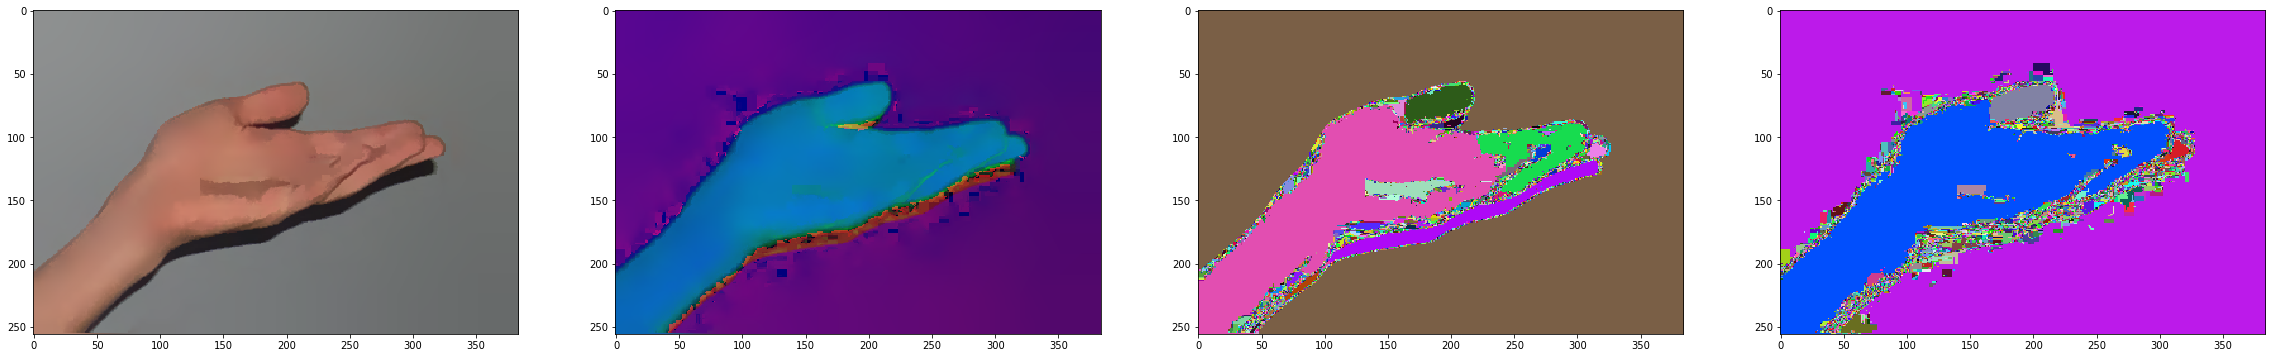

In [13]:
plt.figure(figsize=(40,160))

plt.subplot(1,4,1)
plt.imshow(res)

plt.subplot(1,4,2)
plt.imshow(res2)

plt.subplot(1,4,3)
plt.imshow(dst3)

plt.subplot(1,4,4)
plt.imshow(dst4)

plt.show()